# Cluster by Neighborhoods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../data/processed_data/data_0.csv')

The data may have errors, so these will be clipped.

In [3]:
df['LATITUDE'] = df['LATITUDE'].clip(lower=40.69, upper=40.88)
df['LONGITUDE'] = df['LONGITUDE'].clip(lower=-74.03, upper=-73.9)

In [4]:
km = KMeans(n_clusters=84, random_state=2022)
km.fit(df[['LATITUDE', 'LONGITUDE']]);

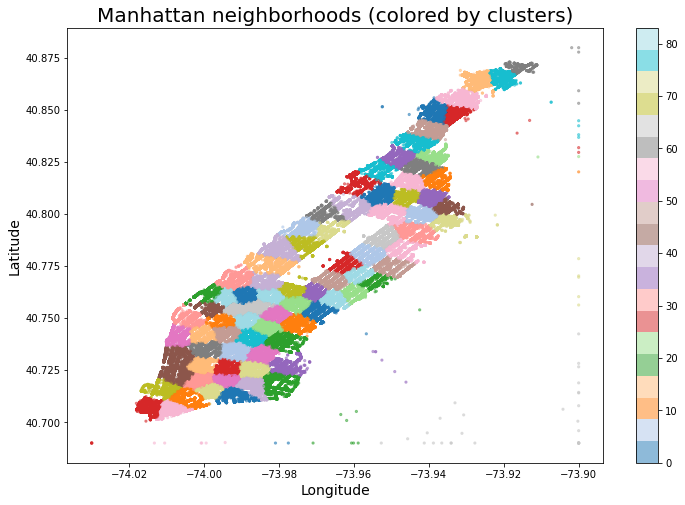

In [5]:
fig, ax = plt.subplots(1, figsize=(12, 8))
im = ax.scatter(df['LONGITUDE'], df['LATITUDE'], c=km.labels_, cmap='tab20', s=5, alpha=0.5)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_title('Manhattan neighborhoods (colored by clusters)', fontsize=20)
fig.colorbar(im, ax=ax, orientation='vertical');

In [9]:
fig.savefig('../images/clusters.png', transparent=True, bbox_inches="tight");

In [6]:
df['CLUSTER'] = km.labels_

In [7]:
df.drop(columns=['LATITUDE', 'LONGITUDE'], inplace=True)

In [8]:
df.to_csv('../data/processed_data/data_1.csv', index=False)